In [10]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (average time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [38]:
df = pd.read_csv('Ecommerce.csv')
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Get rid of non-numerical columns of the dataset

In [72]:
df.drop(['Email','Address','Avatar'], axis=1, inplace=True)

In [73]:
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

In [41]:
import matplotlib.pyplot as plt

Text(18.125, 0.5, 'Yearly Amount Spent')

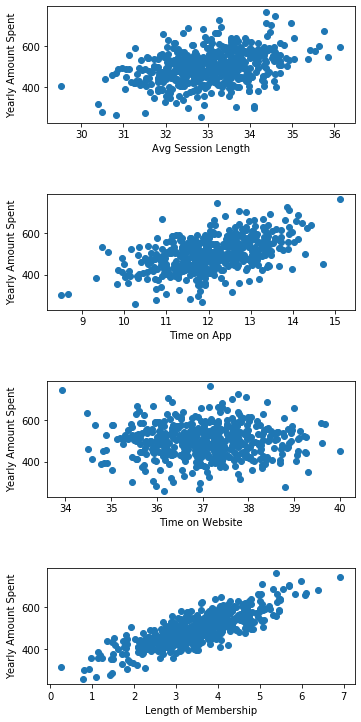

In [48]:
fig, axs = plt.subplots(4, 1)
fig.set_figwidth(5)
fig.set_figheight(10)
fig.tight_layout(h_pad = 5)

axs[0].scatter(df['Avg Session Length'], df['Yearly Amount Spent'])
axs[0].set_xlabel('Avg Session Length')
axs[0].set_ylabel('Yearly Amount Spent')

axs[1].scatter(df['Time on App'], df['Yearly Amount Spent'])
axs[1].set_xlabel('Time on App')
axs[1].set_ylabel('Yearly Amount Spent')

axs[2].scatter(df['Time on Website'], df['Yearly Amount Spent'])
axs[2].set_xlabel('Time on Website')
axs[2].set_ylabel('Yearly Amount Spent')

axs[3].scatter(df['Length of Membership'], df['Yearly Amount Spent'])
axs[3].set_xlabel('Length of Membership')
axs[3].set_ylabel('Yearly Amount Spent')


### Leave only one feature that has a linear relationship with the target variable.

In [77]:
df = df[['Length of Membership', 'Yearly Amount Spent']]
df.head()

,Length of Membership,Yearly Amount Spent
0,4.082621,587.951054
1,2.664034,392.204933
2,4.104543,487.547505
3,3.120179,581.852344
4,4.446308,599.406092


### Divide the dataset into training and test sets with the ratio 80:20.

In [53]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Yearly Amount Spent'])],df['Yearly Amount Spent'], test_size=0.2, random_state=42)

In [54]:
len(df)

500

In [55]:
len(xTrain), len(xTest)

(400, 100)

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [14]:
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    
    #TODO
    
    return 0

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [20]:
def plot_fitted_line(b0: float,
                     b1: float,
                     x,
                     y,
                     username: str):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    pass

### Plot example

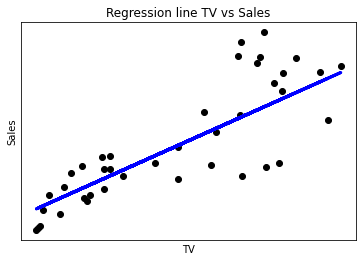

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [56]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(xTrain, yTrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
regr.coef_, regr.intercept_

(array([64.64010065]), 271.3521128033932)

In [60]:
y_pred = regr.predict(xTest)
y_pred

array([493.36239897, 520.31855413, 545.31600502, 461.48520003,
       492.99396212, 515.23721032, 485.32056439, 519.19322598,
       451.02061187, 518.66711703, 478.38181964, 437.25997065,
       426.42887189, 555.55213423, 463.1107777 , 451.30776963,
       513.53096689, 469.30389796, 435.0236958 , 515.80181189,
       475.81469361, 494.17254457, 470.85326474, 581.25694008,
       454.79704458, 532.13523835, 591.85482738, 528.26564599,
       457.33621854, 399.14605254, 549.43359953, 499.7166409 ,
       500.76216078, 323.16216962, 536.67019854, 478.63718851,
       552.52222761, 439.56421366, 477.91768464, 492.07791614,
       501.5494264 , 359.43550249, 494.16768989, 505.37287005,
       453.64348186, 560.31162899, 535.25312145, 511.37432943,
       363.71143202, 416.47869176, 491.22685953, 463.48003411,
       589.40198982, 567.03453121, 553.78842215, 490.61459784,
       389.37748159, 369.383711  , 564.92775134, 558.48695174,
       450.33098111, 412.39790936, 531.17108091, 459.14

In [62]:
import numpy as np
np.array(yTest)

array([401.03313522, 534.7771881 , 418.6027421 , 503.97837905,
       410.06961106, 557.60826205, 538.94197453, 514.33655827,
       408.62018783, 475.01540709, 427.1993849 , 434.02169975,
       411.18696357, 533.51493526, 447.3690272 , 407.54216801,
       573.84743772, 497.5866713 , 466.42119882, 467.80092437,
       510.40138845, 510.50147847, 511.97985999, 640.5840619 ,
       444.2859075 , 502.77107457, 551.62014548, 548.51852928,
       390.10327297, 330.59444603, 535.32161009, 478.60091594,
       499.14015245, 298.76200786, 487.54750487, 498.63559849,
       512.16586639, 444.96655165, 468.6684656 , 483.15972078,
       474.53232944, 439.07476674, 515.50247966, 485.92313052,
       491.07322368, 544.77986372, 587.95105397, 522.33740461,
       275.91842065, 436.51560573, 418.1500811 , 493.71919298,
       573.30622226, 608.27181662, 545.94549214, 483.67330802,
       424.18549429, 452.31567548, 568.71757593, 488.78606109,
       510.66179222, 376.49684072, 473.36049557, 479.24

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

Coefficients: 
 [64.64010065]
Mean absolute error: 37.84
Mean squared error: 2162.11
Root mean squared error: 46.50
R-squared: 0.56


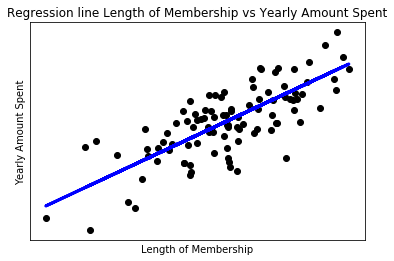

In [65]:
print('Coefficients: \n', regr.coef_)

print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred))



# Plot outputs
plt.scatter(xTest, yTest,  color='black')
plt.plot(xTest, y_pred, color='blue', linewidth=3)

plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.title('Regression line Length of Membership vs Yearly Amount Spent')

plt.xticks(())
plt.yticks(())

plt.show()



### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [79]:
df = pd.read_csv('Ecommerce.csv')
df.drop(['Email','Address','Avatar'], axis=1, inplace=True)
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [80]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Yearly Amount Spent'])],df['Yearly Amount Spent'], test_size=0.2, random_state=42)

In [81]:
xTrain.head()

,Avg Session Length,Length of Membership,Time on App,Time on Website
249,33.780157,3.634996,11.917636,36.844734
433,34.278248,2.117383,11.822722,36.308545
19,32.617856,4.064549,13.989593,37.190504
322,33.264632,4.086566,10.732131,36.145792
332,33.144234,2.190132,11.737041,37.935189


In [83]:
yTest.head()

361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
Name: Yearly Amount Spent, dtype: float64

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

regr = linear_model.LinearRegression()

regr.fit(xTrain, yTrain)

y_pred = regr.predict(xTest)

In [85]:
regr.coef_, regr.intercept_

(array([25.5962591 , 61.89682859, 38.78534598,  0.31038593]),
 -1044.2574146365585)

In [86]:
print('Coefficients: \n', regr.coef_)

print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred))

Coefficients: 
 [25.5962591  61.89682859 38.78534598  0.31038593]
Mean absolute error: 8.56
Mean squared error: 109.86
Root mean squared error: 10.48
R-squared: 0.98
